# Spanish League Teams Clustering

In this notebook we will explore the teams in the Spanish League division 1, we will cluster them by away and home points they earned in a given seasons range.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and exploring the data

In [2]:
df = pd.read_csv("./data/spanish_league.csv")

In [3]:
df.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800


In [4]:
df.tail()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
37142,37143,2017-18,2,42,Valladolid,Osasuna,2,0,02/06/2018,1527890400
37143,37144,2017-18,2,42,Oviedo,Huesca,2,1,02/06/2018,1527890400
37144,37145,2017-18,2,42,Alcorcon,Reus,3,0,02/06/2018,1527890400
37145,37146,2017-18,2,42,Numancia,Cultural Leonesa,2,1,02/06/2018,1527890400
37146,37147,2017-18,2,42,Barcelona Atletic,Zaragoza,0,2,02/06/2018,1527890400


In [5]:
df.columns

Index(['id', 'season', 'division', 'round', 'localTeam', 'visitorTeam',
       'localGoals', 'visitorGoals', 'date', 'timestamp'],
      dtype='object')

In [6]:
df.isnull().sum()

id              0
season          0
division        0
round           0
localTeam       0
visitorTeam     0
localGoals      0
visitorGoals    0
date            0
timestamp       0
dtype: int64

In [7]:
df.describe()

,id,division,round,localGoals,visitorGoals,timestamp
count,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,3.714700e+04
mean,18574.000000,1.537809,19.862896,1.515385,0.936953,8.116889e+08
std,10723.559561,0.498575,11.282774,1.262742,1.010263,4.322134e+08
min,1.000000,1.000000,1.000000,0.000000,0.000000,2.133360e+07
25%,9287.500000,1.000000,10.000000,1.000000,0.000000,4.453884e+08
50%,18574.000000,2.000000,20.000000,1.000000,1.000000,8.317656e+08
75%,27860.500000,2.000000,29.000000,2.000000,1.000000,1.181426e+09
max,37147.000000,2.000000,44.000000,10.000000,8.000000,1.527890e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37147 entries, 0 to 37146
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            37147 non-null  int64 
 1   season        37147 non-null  object
 2   division      37147 non-null  int64 
 3   round         37147 non-null  int64 
 4   localTeam     37147 non-null  object
 5   visitorTeam   37147 non-null  object
 6   localGoals    37147 non-null  int64 
 7   visitorGoals  37147 non-null  int64 
 8   date          37147 non-null  object
 9   timestamp     37147 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.8+ MB


We can see that the `season` column is in a format of `'XX01-02'`, we also have `division` column which we will use to screen the other leagues.  
Finally we have `localTeam`, `visitorTeam` columns and their respected goals, `localGoals`, `visitorGoals`.  

We see that there are no null values and the columns we are going to use are in the right format and are clean.  

The `date`, `timestamp` and `round` columns are not important for us at this point.

In [9]:
df = df.drop(["date", 'timestamp', 'round'], axis=1)

In [10]:
df.head()

,id,season,division,localTeam,visitorTeam,localGoals,visitorGoals
0,1,1970-71,1,Atletico de Bilbao,Barcelona,1,1
1,2,1970-71,1,Las Palmas,Atletico de Madrid,1,1
2,3,1970-71,1,Real Madrid,Valencia,2,0
3,4,1970-71,1,Celta de Vigo,Sporting de Gijon,2,0
4,5,1970-71,1,Elche,Granada,1,1


## We will only look at the first division

In [11]:
df = df[df['division'] == 1]

checking that the teams are written ok and that the same away team are in the visitor teams (each team has away and home game with the other teams)

In [12]:
local_teams = df['localTeam'].unique()
visitor_teams = df['visitorTeam'].unique()
local_teams

array(['Atletico de Bilbao', 'Las Palmas', 'Real Madrid', 'Celta de Vigo',
       'Elche', 'Espanol', 'Sabadell', 'Zaragoza', 'Valencia',
       'Atletico de Madrid', 'Barcelona', 'Sporting de Gijon', 'Granada',
       'CD Malaga', 'Real Sociedad', 'Sevilla', 'Deportivo', 'Betis',
       'Burgos', 'Cordoba', 'Castellon', 'Oviedo', 'Santander', 'Murcia',
       'Hercules', 'Salamanca', 'Cadiz', 'Rayo Vallecano',
       'Recreativo de Huelva', 'AD Almeria', 'Osasuna', 'Valladolid',
       'Mallorca', 'Logrones', 'Tenerife', 'Real Burgos', 'Albacete',
       'Lleida', 'Compostela', 'Merida', 'Extremadura', 'Alaves',
       'Villarreal', 'Malaga', 'Numancia', 'Getafe', 'Levante',
       'Gimnastic de Tarragona', 'Almeria', 'Xerez', 'Eibar', 'Leganes',
       'Girona'], dtype=object)

In [13]:
set(visitor_teams) == set(local_teams)

True

## Screen the dataframe for the choosen seasons

The dataset is ordered by date, so we will find the start and end seasons groups and take the first index of the start season and the last index of the end season.  
Lets choose the seasons range:

In [14]:
def get_df_by_seasons(start_season, end_season):
    start_index = df[df['season'] == start_season]
    end_index = df[df['season'] == end_season]

    idx_end = end_index.iloc[-1]['id']
    idx_start = start_index.iloc[0]['id']

    _df_seasons = df[df['id'].isin(list(range(idx_start, idx_end+1)))]
    return _df_seasons

In [15]:
df_seasons = get_df_by_seasons("1974-75", "1990-91")

In [16]:
df_seasons.head()

,id,season,division,localTeam,visitorTeam,localGoals,visitorGoals
2678,2679,1974-75,1,Espanol,Celta de Vigo,2,0
2679,2680,1974-75,1,Sporting de Gijon,Zaragoza,2,0
2680,2681,1974-75,1,Hercules,Murcia,2,2
2681,2682,1974-75,1,Las Palmas,Betis,3,1
2682,2683,1974-75,1,CD Malaga,Atletico de Bilbao,2,0


In [17]:
df_seasons.shape

(5587, 7)

How many teams we have:

In [18]:
teams = sorted(df_seasons['localTeam'].unique())
len(teams)

34

### Adding local_win draw visitor_won columns

Here we will take the `localGoals`, `visitorGoals` columns and we will check which of the teams won.

We will add 3 columns to use: `localWins` & `Draw` & `visitorWins`

In [19]:
# encoding the columns with 0 and 1
# constructing the local wins
localWins = df_seasons['localGoals'] > df_seasons['visitorGoals']
draws = df_seasons['localGoals'] == df_seasons['visitorGoals']
df_seasons['localWins'] = localWins.apply(int)
df_seasons['localDraw'] = draws.apply(int)

# construct the visitors wins
visitorWins = df_seasons['localGoals'] < df_seasons['visitorGoals']
df_seasons['visitorWins'] = visitorWins.apply(int)

<ipython-input-19-4ca1b9835223>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seasons['localWins'] = localWins.apply(int)
<ipython-input-19-4ca1b9835223>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seasons['localDraw'] = draws.apply(int)
<ipython-input-19-4ca1b9835223>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

### Aggregating the 3 columns we added to form a histogram table

Summing up the local wins and draws by each team:

In [20]:
# constructing the dataframe for the aggregated local games, summing the local wins and draws
df_calc = df_seasons[['localTeam', 'localWins', 'localDraw', 'visitorWins']]
df_local = df_calc.groupby("localTeam").agg({"localWins":sum, "localDraw": sum})
df_local.head()

,localWins,localDraw
localTeam,,
AD Almeria,15,14
Atletico de Bilbao,206,65
Atletico de Madrid,203,62
Barcelona,225,51
Betis,151,66


Summing up the visitor wins and draws by each team:

In [21]:
# constructing the dataframe for the aggregated visitors games, summing the visitors wins and draws
df_calc1 = df_seasons[['visitorTeam', 'localDraw', 'visitorWins']]
df_visitor = df_calc1.groupby("visitorTeam").agg({"visitorWins":sum, "localDraw": sum})
df_visitor.rename(columns={"localDraw": "visitorDraw"},inplace=True)
df_visitor.head()

,visitorWins,visitorDraw
visitorTeam,,
AD Almeria,1,4
Atletico de Bilbao,56,91
Atletico de Madrid,79,92
Barcelona,94,96
Betis,43,58


Constructing the dataset by each team with the total points of away games and local games:

In [22]:
# constructing the total points per team for local and visitor games
df_total = pd.concat([df_local, df_visitor], axis=1)
# calculating the local points
df_total['local_points'] = 3 * df_total['localWins'] + df_total['localDraw']
df_total.drop(['localWins', 'localDraw'], axis=1, inplace=True)
# calculating the visitor points
df_total['visitor_points'] = 3 * df_total['visitorWins'] + df_total['visitorDraw']
df_total.drop(['visitorWins', 'visitorDraw'], axis=1, inplace=True)

# adding a total points column
df_total['total_points'] = df_total['local_points'] + df_total['visitor_points']
df_total.head()

,local_points,visitor_points,total_points
AD Almeria,59,7,66
Atletico de Bilbao,683,259,942
Atletico de Madrid,671,329,1000
Barcelona,726,378,1104
Betis,519,187,706


## Cluster teams with KMeans

We want to see the ranks of teams within range of season so we will use KMeans to cluster those teams.  
**First we will scale our data:**

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_total[['local_points', 'visitor_points', 'total_points']] = scaler.fit_transform(df_total[['local_points', 'visitor_points', 'total_points']])
df_total.head()

,local_points,visitor_points,total_points
AD Almeria,0.047043,0.004545,0.031250
Atletico de Bilbao,0.885753,0.577273,0.771115
Atletico de Madrid,0.869624,0.736364,0.820101
Barcelona,0.943548,0.847727,0.907939
Betis,0.665323,0.413636,0.571791


**Performing elbow method to determine the number of clusters**

In [24]:
from sklearn.cluster import KMeans

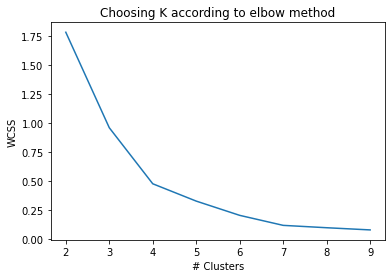

In [25]:
ks = np.arange(2,10)
wcss = []
for k in ks:
    k_means = KMeans(n_clusters=k, random_state=11)
    k_means.fit(df_total)
    wcss.append(k_means.inertia_)

plt.plot(ks, wcss)
plt.title("Choosing K according to elbow method")
plt.xlabel("# Clusters")
plt.ylabel("WCSS")
plt.show()

We see that the "elbow" is at `k=4`

**Cluster the teams**

In [26]:
k_means = KMeans(n_clusters=4, random_state=11)
y = k_means.fit_predict(df_total)

In [27]:
y

array([1, 2, 0, 0, 2, 1, 3, 3, 1, 3, 1, 2, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1,
       0, 2, 1, 1, 3, 3, 2, 2, 1, 2, 3, 2], dtype=int32)

**Show the clusters in 2D:**

In [28]:
x = df_total.copy() # For easy use

In [29]:
def plot_2d(x,y):
    plt.scatter(x.iloc[y == 0, 0], x.iloc[y == 0, 1], c='red')
    plt.scatter(x.iloc[y == 1, 0], x.iloc[y == 1, 1], c='blue')
    plt.scatter(x.iloc[y == 2, 0], x.iloc[y == 2, 1], c='green')
    plt.scatter(x.iloc[y == 3, 0], x.iloc[y == 3, 1], c='yellow')
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='black')
    plt.xlabel("Total Local Points")
    plt.ylabel("Total Away Points")
    plt.show()


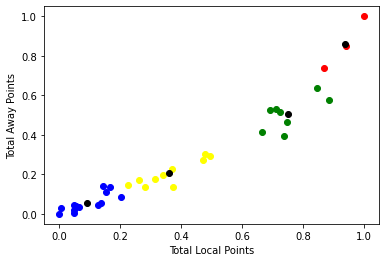

In [30]:
plot_2d(x,y)

Lets see who are the best teams over this period:

In [31]:
x.iloc[y==0]

,local_points,visitor_points,total_points
Atletico de Madrid,0.869624,0.736364,0.820101
Barcelona,0.943548,0.847727,0.907939
Real Madrid,1.000000,1.000000,1.000000


## Lets put everything together

In [32]:
def plot_teams_by_ranks(start_season, end_season):
    df_seasons = get_df_by_seasons(start_season, end_season)
    
    localWins = df_seasons['localGoals'] > df_seasons['visitorGoals']
    draws = df_seasons['localGoals'] == df_seasons['visitorGoals']
    df_seasons['localWins'] = localWins.apply(int)
    df_seasons['localDraw'] = draws.apply(int)

    # construct the visitors wins
    visitorWins = df_seasons['localGoals'] < df_seasons['visitorGoals']
    df_seasons['visitorWins'] = visitorWins.apply(int)
    
    df_calc = df_seasons[['localTeam', 'localWins', 'localDraw', 'visitorWins']]
    df_local = df_calc.groupby("localTeam").agg({"localWins":sum, "localDraw": sum})
    
    df_calc1 = df_seasons[['visitorTeam', 'localDraw', 'visitorWins']]
    df_visitor = df_calc1.groupby("visitorTeam").agg({"visitorWins":sum, "localDraw": sum})
    df_visitor.rename(columns={"localDraw": "visitorDraw"},inplace=True)
    
    # constructing the total points per team for local and visitor games
    df_total = pd.concat([df_local, df_visitor], axis=1)
    # calculating the local points
    df_total['local_points'] = 3 * df_total['localWins'] + df_total['localDraw']
    df_total.drop(['localWins', 'localDraw'], axis=1, inplace=True)
    # calculating the visitor points
    df_total['visitor_points'] = 3 * df_total['visitorWins'] + df_total['visitorDraw']
    df_total.drop(['visitorWins', 'visitorDraw'], axis=1, inplace=True)

    # adding a total points column
    df_total['total_points'] = df_total['local_points'] + df_total['visitor_points']
    
    # Scaling the data
    scaler = MinMaxScaler()
    df_total[['local_points', 'visitor_points', 'total_points']] = scaler.fit_transform(df_total[['local_points', 'visitor_points', 'total_points']])
    
    k_means = KMeans(n_clusters=4, random_state=11)
    y = k_means.fit_predict(df_total)
    #print(np.argmax(k_means.cluster_centers_.sum(axis=1)))
    plot_2d(df_total,y)
    y_best = np.argmax(k_means.cluster_centers_.sum(axis=1))
    print(df_total[y==y_best].sort_values('total_points', ascending=False))
    
#     df_total['TeamName'] = df_total.index
#     fig = px.scatter_3d(df_total, x='local_points', y='visitor_points', z='total_points', text='TeamName', color='total_points')
#     fig.show()

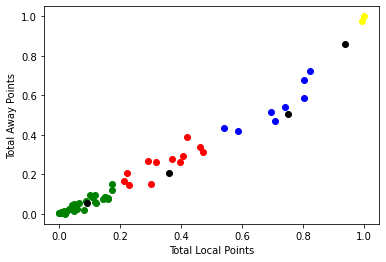

             local_points  visitor_points  total_points
Real Madrid       1.00000        1.000000      1.000000
Barcelona         0.99439        0.975542      0.986816


In [33]:
start_season, end_season = "1970-71", "2017-18"
plot_teams_by_ranks(start_season, end_season)

<ipython-input-32-3b435035c93c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seasons['localWins'] = localWins.apply(int)
<ipython-input-32-3b435035c93c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seasons['localDraw'] = draws.apply(int)
<ipython-input-32-3b435035c93c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

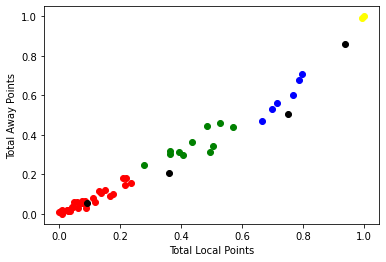

             local_points  visitor_points  total_points
Real Madrid      1.000000        1.000000      1.000000
Barcelona        0.993653        0.992671      0.993223


In [34]:
start_season, end_season = "1980-81", "2017-18"
plot_teams_by_ranks(start_season, end_season)

<ipython-input-32-3b435035c93c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seasons['localWins'] = localWins.apply(int)
<ipython-input-32-3b435035c93c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seasons['localDraw'] = draws.apply(int)
<ipython-input-32-3b435035c93c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

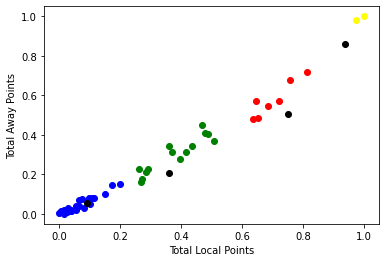

             local_points  visitor_points  total_points
Barcelona        1.000000        1.000000      1.000000
Real Madrid      0.974596        0.980084      0.976858


In [35]:
start_season, end_season = "1990-91", "2017-18"
plot_teams_by_ranks(start_season, end_season)

<ipython-input-32-3b435035c93c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seasons['localWins'] = localWins.apply(int)
<ipython-input-32-3b435035c93c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seasons['localDraw'] = draws.apply(int)
<ipython-input-32-3b435035c93c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

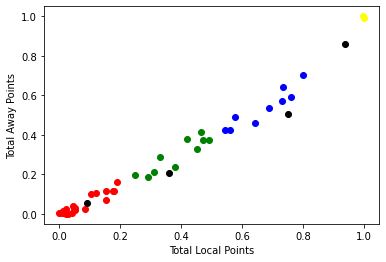

             local_points  visitor_points  total_points
Real Madrid      0.996394        1.000000      1.000000
Barcelona        1.000000        0.992284      0.998643


In [36]:
start_season, end_season = "2000-01", "2017-18"
plot_teams_by_ranks(start_season, end_season)